In [1]:
import numpy as np
import matplotlib.pyplot as plt
from modules.Rocket import Rocket
from modules.Dynamics import Dynamics
from modules.MPC import MPC


import time
import pylab as pl
from IPython import display

#np.set_printoptions(precision=3,suppress=True)

In [2]:
#https://www.spacex.com/vehicles/falcon-9/

falcon = Rocket("Falcon 9")
falcon.mass = 1 #kg
falcon.height = 70 #m
falcon.radius = 3.7/2 #m
falcon.max_thrust = 7607e3 #N
falcon.cg_thrust_length = 20 #m
falcon.cg_cp_length = 15 #m
falcon.Cd = 10000.82

falcon.load()
dynamics = Dynamics(falcon)
mpc = MPC(falcon)
mpc.tf = 20

x0 = [0,0,100,10,0,0]

mpc.approxTf(x0)



from scipy.integrate import solve_ivp
N = 1000
tf = 20
t_eval = np.linspace(0,tf,N+2)

for i in range(1):
    mpc_nominal = mpc.run(x0)
    plt.figure()
    plt.plot(mpc_nominal[9],mpc_nominal[2],label="x")

    for i in range(len(mpc_nominal)-1):
        mpc_nominal[i] = np.interp(t_eval,mpc_nominal[9],mpc_nominal[i])

    for i in range(N):
        x,y,z,dx,dy,dz= x0
        q = np.array([[x,y,z]]).T
        dq = np.array([[dx,dy,dz]]).T

        u_nominal = np.array([[mpc_nominal[0][i],mpc_nominal[1][i],mpc_nominal[2][i]]]).T
        d = np.random.uniform(low=-1, high=1, size=(3,1))*1
        
        def ode(t,state):
            x,y,z,dx,dy,dz= state
        
            Cd = 0.1
            q = np.array([[x,y,z]]).T
            dq = np.array([[dx,dy,dz]]).T

            #random vector
            
            ddr = np.array([[0,0,-9.81]]).T + u_nominal + d #-Cd*np.abs(dq)*dq
            
            return [dx,dy,dz,ddr[0,0],ddr[1,0],ddr[2,0]]

        sol = solve_ivp(ode,[0,tf/N],x0)
        #x0 = sol.y[:,-1]
        

    x,y,z,dx,dy,dz= x0
    q = np.array([[x,y,z]]).T
    dq = np.array([[dx,dy,dz]]).T




In [3]:
mpc.tf = 12
mpc_nominal = mpc.run(x0)

Starting MindtPy version 0.1.0 using OA algorithm
iteration_limit: 50
stalling_limit: 15
time_limit: 600
strategy: OA
add_regularization: None
call_after_main_solve: <pyomo.contrib.gdpopt.util._DoNothing object at 0x0000017D82606C50>
call_after_subproblem_solve: <pyomo.contrib.gdpopt.util._DoNothing object at 0x0000017D82606C90>
call_after_subproblem_feasible: <pyomo.contrib.gdpopt.util._DoNothing object at 0x0000017D82606CD0>
tee: true
logger: <Logger pyomo.contrib.mindtpy (INFO)>
logging_level: 20
integer_to_binary: false
add_no_good_cuts: false
use_tabu_list: false
single_tree: false
solution_pool: false
num_solution_iteration: 5
cycling_check: true
feasibility_norm: L_infinity
differentiate_mode: reverse_symbolic
use_mcpp: false
calculate_dual_at_solution: false
use_fbbt: false
use_dual_bound: true
partition_obj_nonlinear_terms: true
quadratic_strategy: 0
move_objective: false
add_cuts_at_incumbent: false
heuristic_nonconvex: false
init_strategy: rNLP
level_coef: 0.5
solution_limit

ERROR: evaluating object as numeric value:
    1/tf**2*(0.05*dx2[0])*dx2[0]/abs(dx2[0]) + 1/tf**2*abs(dx2[0])*0.05
        (object: <class 'pyomo.core.expr.numeric_expr.SumExpression'>)
    float division by zero


ZeroDivisionError: float division by zero

Text(0, 0.5, 'Abs Thrust')

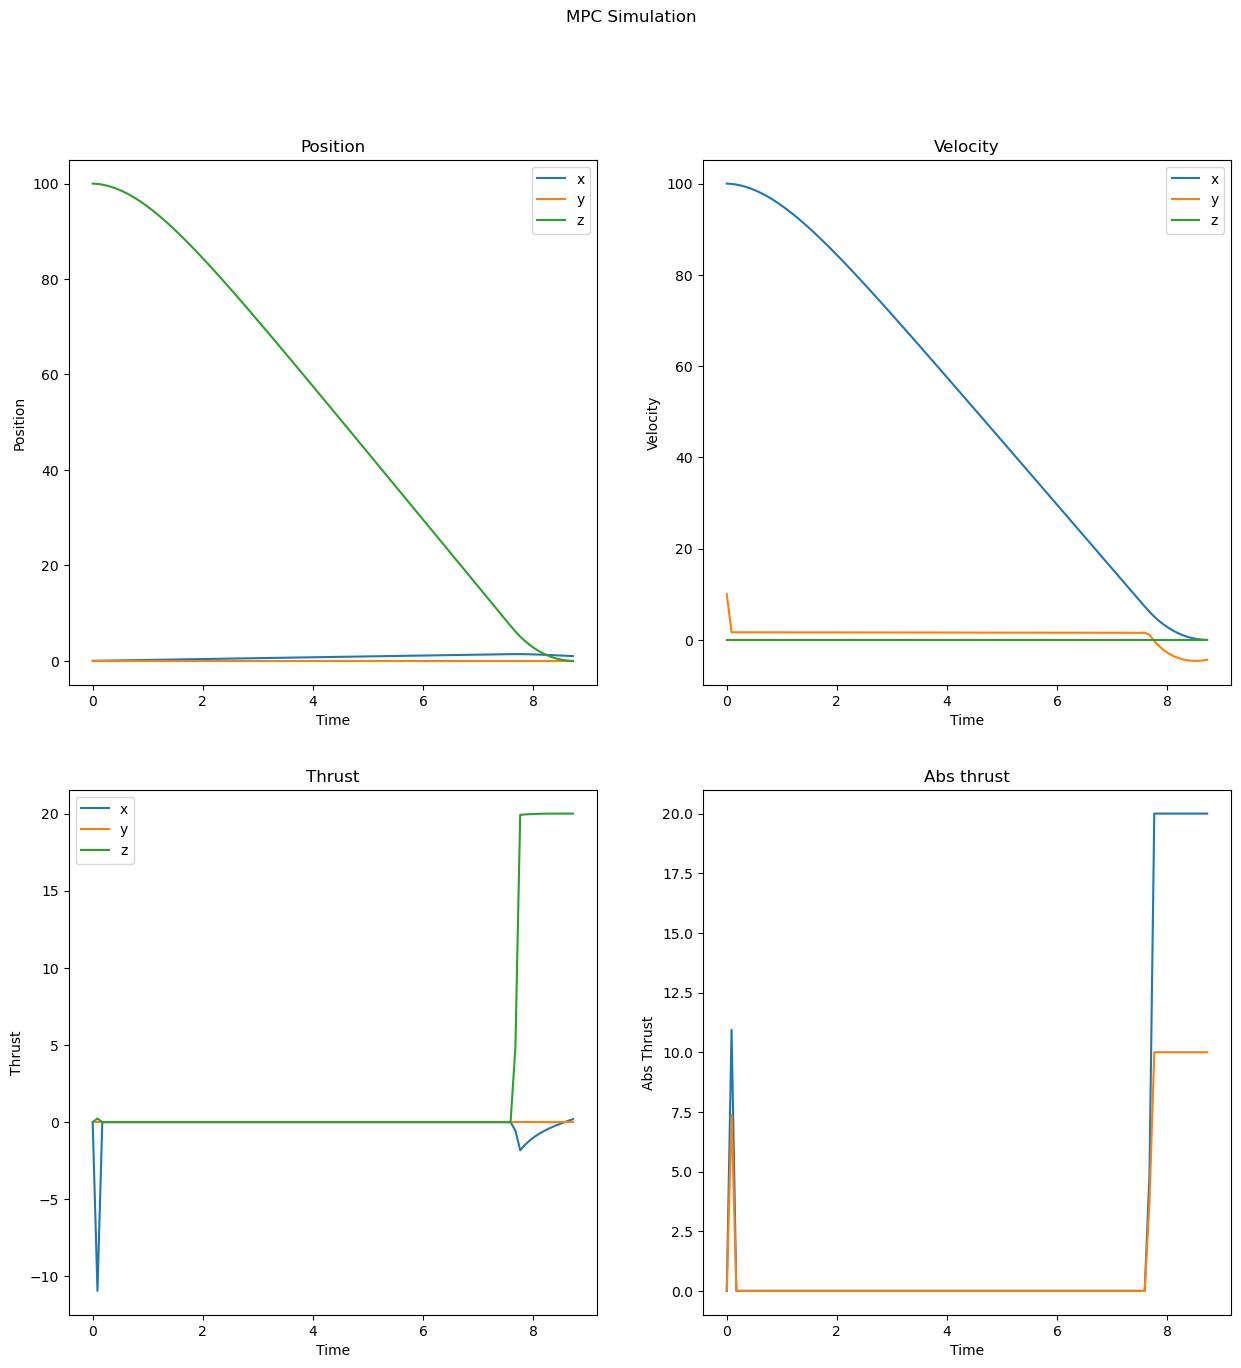

In [ ]:
#create several figures in one plt

fig, axs = plt.subplots(2, 2,figsize=(15,15))
fig.suptitle('MPC Simulation')

axs[0,0].set_title("Position")
axs[0,0].plot(mpc_nominal[9],mpc_nominal[3])
axs[0,0].plot(mpc_nominal[9],mpc_nominal[4])
axs[0,0].plot(mpc_nominal[9],mpc_nominal[5])
axs[0,0].set_xlabel("Time")
axs[0,0].set_ylabel("Position")
axs[0,0].legend(["x","y","z"])



axs[0,1].set_title("Velocity")
axs[0,1].plot(mpc_nominal[9],mpc_nominal[5])
axs[0,1].plot(mpc_nominal[9],mpc_nominal[6])
axs[0,1].plot(mpc_nominal[9],mpc_nominal[7])
axs[0,1].set_xlabel("Time")
axs[0,1].set_ylabel("Velocity")
axs[0,1].legend(["x","y","z"])

axs[1,0].set_title("Thrust")
axs[1,0].plot(mpc_nominal[9],mpc_nominal[0])
axs[1,0].plot(mpc_nominal[9],mpc_nominal[1])
axs[1,0].plot(mpc_nominal[9],mpc_nominal[2])
axs[1,0].set_xlabel("Time")
axs[1,0].set_ylabel("Thrust")
axs[1,0].legend(["x","y","z"])

axs[1,1].set_title("Abs thrust")
axs[1,1].plot(mpc_nominal[9],np.sqrt(mpc_nominal[0]**2 + mpc_nominal[1]**2 + mpc_nominal[2]**2))
axs[1,1].plot(mpc_nominal[9],mpc_nominal[10]*10)

axs[1,1].set_xlabel("Time")
axs[1,1].set_ylabel("Abs Thrust")
